In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [119]:
df_india = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/covid_19_india.csv")
df_individual = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/IndividualDetails.csv")
df_population = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/population_india_census2011.csv")
df_imcrt = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/ICMRTestingDetails.csv")
df_hospital_bed = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/HospitalBedsIndia.csv")
df_age_group = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/AgeGroupDetails.csv")

In [120]:
df_india['ConfirmedIndianNational'] = df_india.ConfirmedIndianNational.replace('-',0)
df_india['ConfirmedForeignNational'] = df_india.ConfirmedForeignNational.replace('-',0)
df_india['ConfirmedIndianNational']= df_india['ConfirmedIndianNational'].astype('int64')
df_india['ConfirmedForeignNational']= df_india['ConfirmedForeignNational'].astype('int64')

In [121]:
df_india['Total Cases'] = df_india['Confirmed']
df_india['Active Cases'] = df_india['Total Cases'] - df_india['Cured'] - df_india['Deaths']

In [208]:
recent_date = df_india['Date'].max()
covid_19_india = df_india[df_india['Date']==recent_date]
covid_19_india[["Date",'State/UnionTerritory','Cured','Deaths','Confirmed']]

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
529,2020-04-01,Andhra Pradesh,1,0,83
530,2020-04-01,Andaman and Nicobar Islands,0,0,10
531,2020-04-01,Bihar,0,1,23
532,2020-04-01,Chandigarh,0,0,13
533,2020-04-01,Chhattisgarh,0,0,9
534,2020-04-01,Delhi,6,2,120
535,2020-04-01,Goa,0,0,5
536,2020-04-01,Gujarat,5,6,74
537,2020-04-01,Haryana,21,0,43
538,2020-04-01,Himachal Pradesh,0,1,3


In [123]:
# df_india['ConfirmedIndianNational'].value_counts()

In [124]:
# df_india['ConfirmedForeignNational'].value_counts()

In [125]:
# df_india.info()

In [126]:
df_india['State/UnionTerritory'].nunique()

30

In [127]:
df_india["Date"] = pd.to_datetime(df_india["Date"],infer_datetime_format=True,dayfirst=True)

In [128]:
df_india.shape

(556, 11)

In [129]:
df_india=df_india.drop(["Sno"],axis=1)

In [130]:
df_india.isnull().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
Total Cases                 0
Active Cases                0
dtype: int64

In [131]:
# df_india = df_india.drop(df_india.columns[7:],axis=1)
# df_india_srt = df_india.sort_values('Date', ascending=True)
# df_india_srt
# df_india.set_index('Date').groupby(pd.Grouper(freq='D')).mean()

In [132]:
df_india_date_wise = df_india.groupby(['Date','State/UnionTerritory','Total Cases'])['Cured','Deaths','Active Cases'] \
            .sum().reset_index().sort_values('Total Cases',ascending = False)

In [133]:
recent_date = df_india['Date'].max()
print(recent_date)

2020-04-01 00:00:00


In [134]:
# df_india_date_wise=df_india_date_wise.drop(["Sno"],axis=1)
df_india_date_wise

,Date,State/UnionTerritory,Total Cases,Cured,Deaths,Active Cases
544,2020-04-01,Maharashtra,302,39,9,254
541,2020-04-01,Kerala,241,23,2,216
513,2020-03-31,Kerala,234,19,1,214
516,2020-03-31,Maharashtra,216,39,9,168
485,2020-03-30,Kerala,202,19,1,182
...,...,...,...,...,...,...
145,2020-03-14,Tamil Nadu,1,0,0,1
143,2020-03-14,Punjab,1,0,0,1
135,2020-03-14,Andhra Pradesh,1,0,0,1
133,2020-03-13,Telengana,1,0,0,1


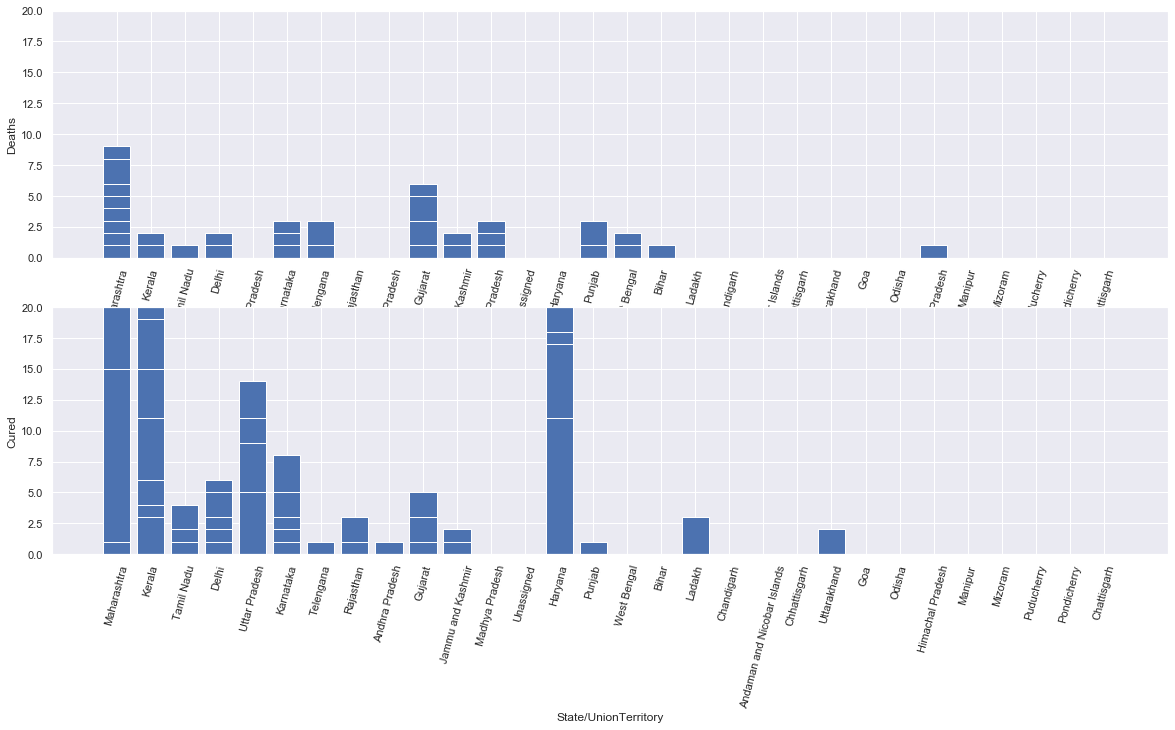

In [135]:
# df_india_date_wise.sort_values(by='Date')
# print(df_india_date_wise.columns) df.sort('Date')
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.bar(df_india_date_wise["State/UnionTerritory"],df_india_date_wise["Deaths"])
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
plt.xticks(rotation=75)
plt.ylim(0, 20)
plt.xlabel("State/UnionTerritory")
plt.ylabel("Deaths")

plt.subplot(2,1,2)
plt.bar(df_india_date_wise["State/UnionTerritory"],df_india_date_wise["Cured"])
plt.xlabel("State/UnionTerritory")
plt.ylabel("Cured")
plt.ylim(0, 20)

plt.xticks(rotation=75)
plt.show()

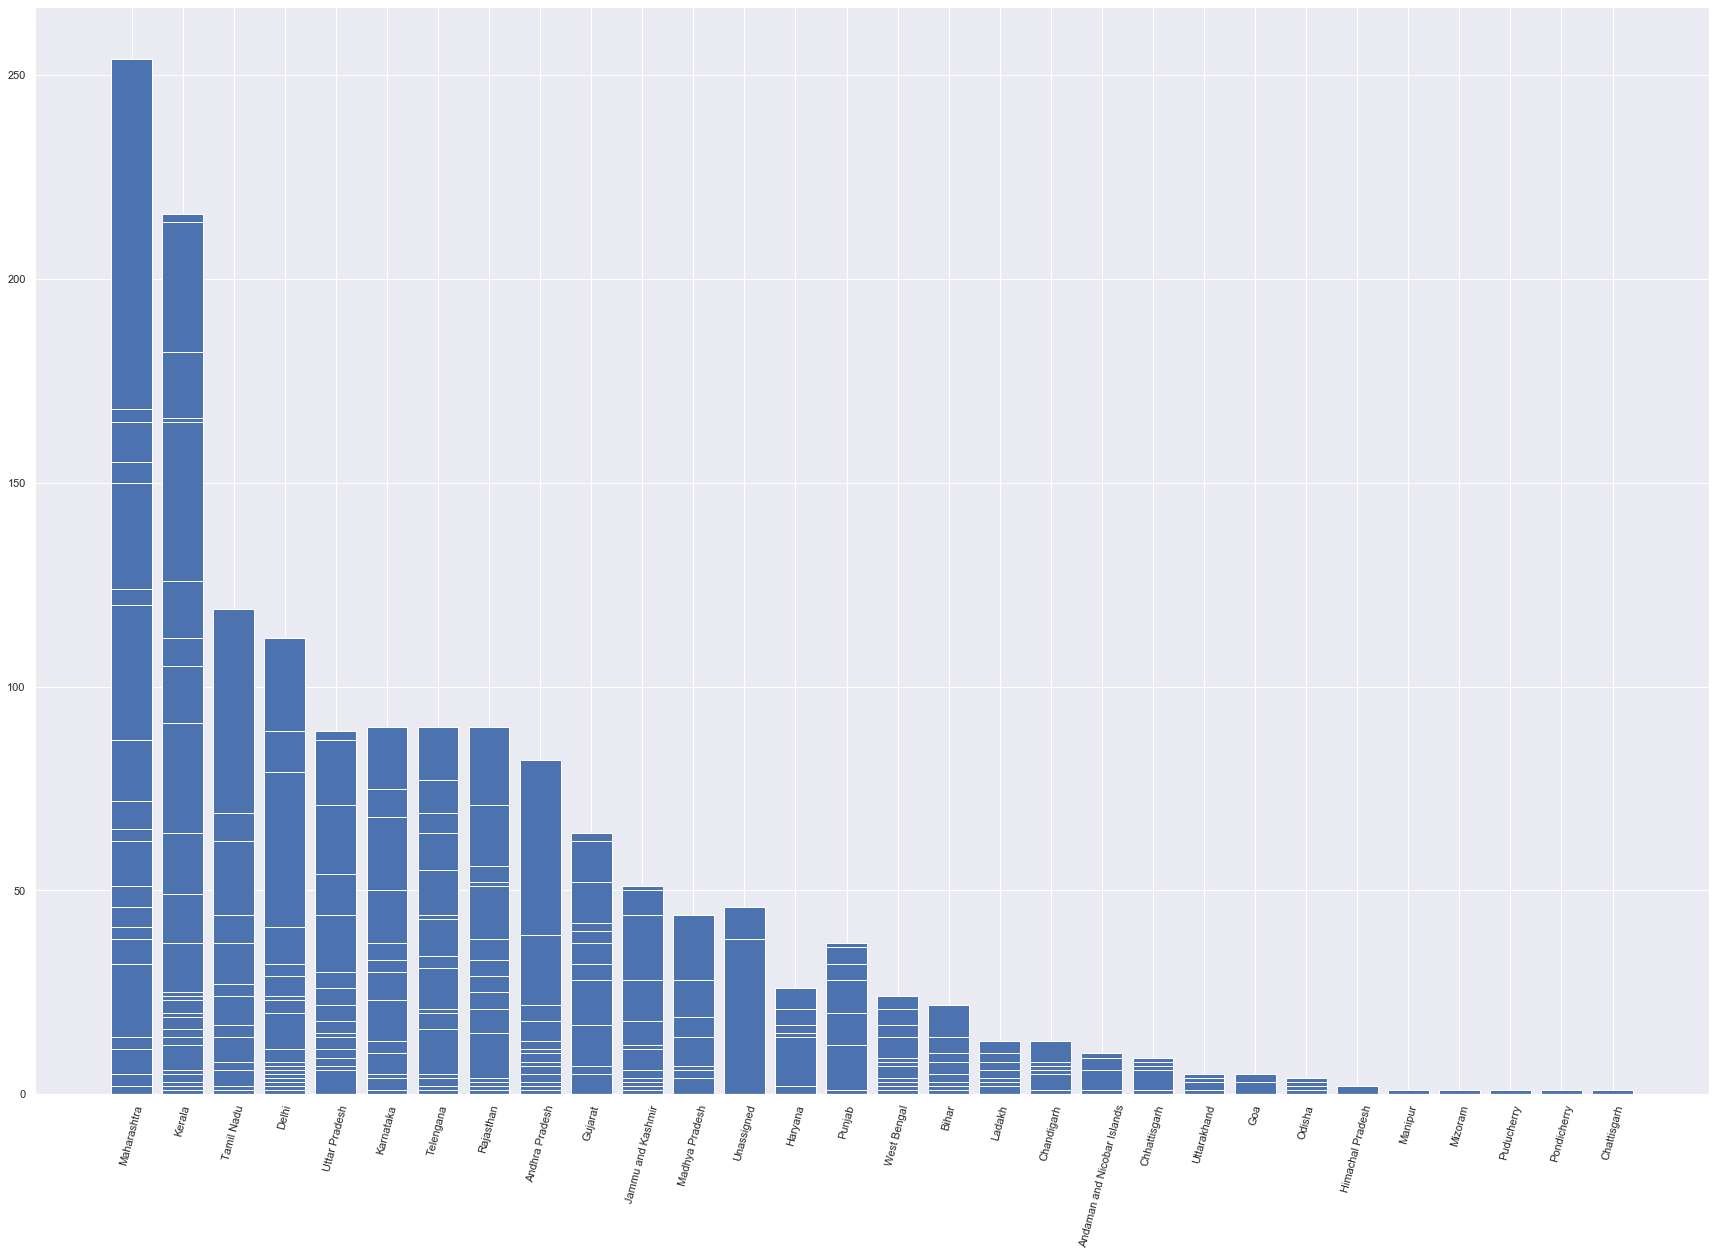

In [136]:
plt.figure(figsize=(30,20))
plt.bar(df_india_date_wise["State/UnionTerritory"],df_india_date_wise["Active Cases"])
plt.xticks(rotation=75)
plt.show()

In [137]:
tmp = df_india_date_wise.groupby(['Date'])["Active Cases","Cured","Deaths","State/UnionTerritory"].sum().reset_index()


In [138]:
# tmp["Date"] = pd.to_datetime(tmp["Date"],infer_datetime_format=True)

In [139]:
tmp.tail(10)

,Date,Active Cases,Cured,Deaths
53,2020-03-23,402,24,7
54,2020-03-24,470,40,9
55,2020-03-25,553,43,10
56,2020-03-26,634,45,15
57,2020-03-27,640,67,17
58,2020-03-28,810,80,19
59,2020-03-29,901,96,27
60,2020-03-30,1118,102,31
61,2020-03-31,1238,124,35
62,2020-04-01,1466,133,38


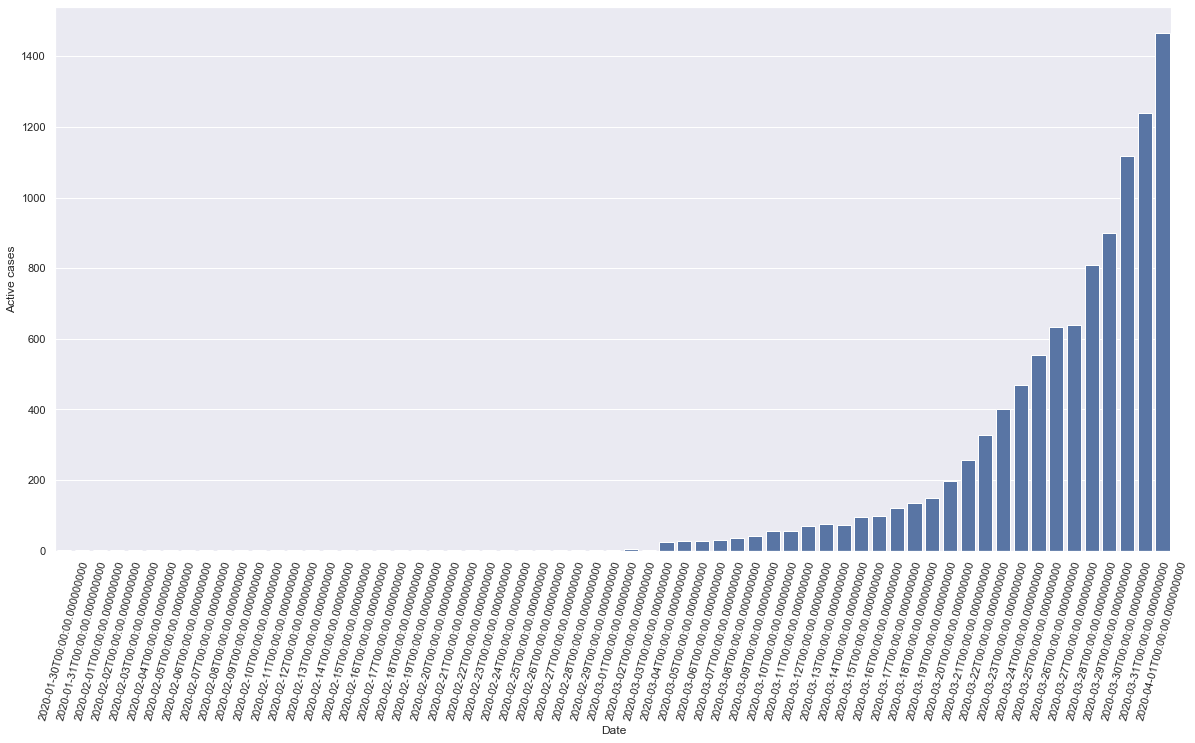

In [140]:
plt.figure(figsize=(20,10))
sns.barplot(tmp["Date"],tmp["Active Cases"],color="b")
plt.xticks(rotation=75)
plt.xlabel("Date")
plt.ylabel("Active cases")
plt.show()

c:\users\indra\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


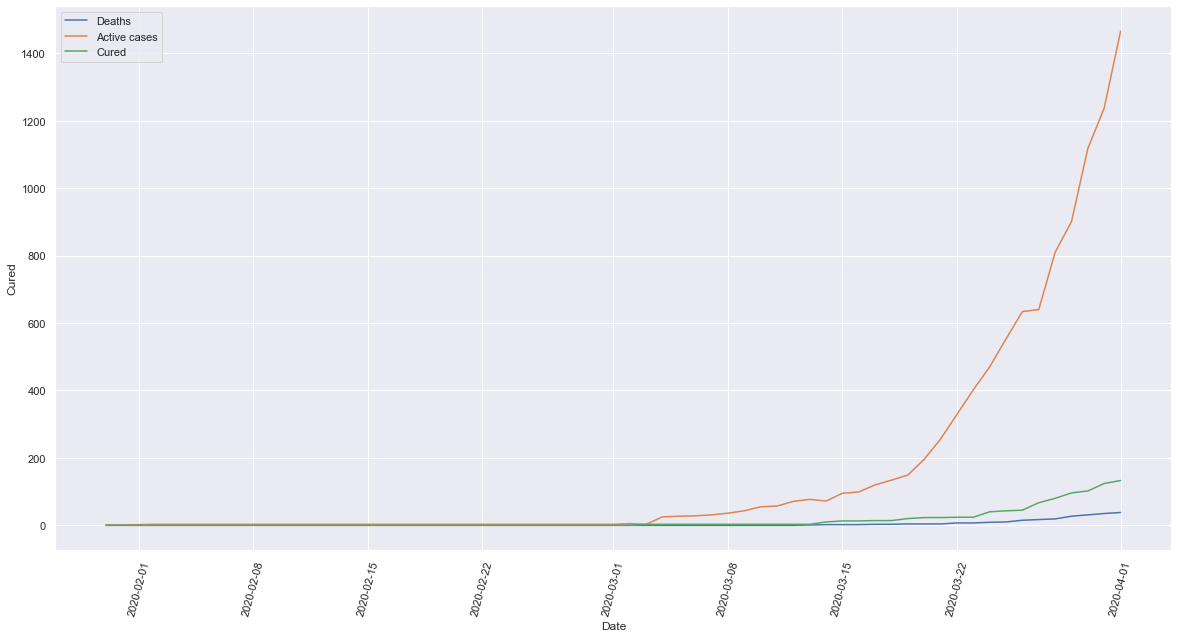

In [141]:
plt.figure(figsize=(20,10))
sns.lineplot(tmp["Date"],tmp["Deaths"])
sns.lineplot(tmp["Date"],tmp["Active Cases"])
sns.lineplot(tmp["Date"],tmp["Cured"])
plt.xticks(rotation=75)
plt.legend(["Deaths","Active cases","Cured"])
plt.show()

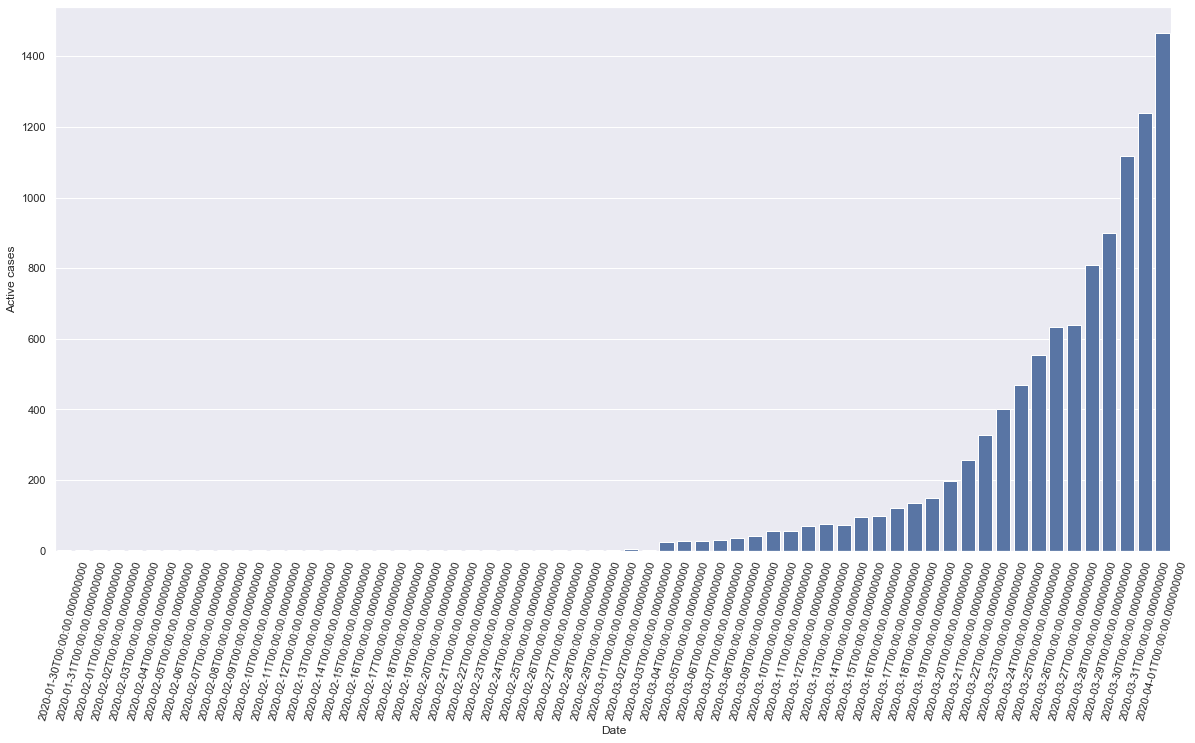

In [142]:
plt.figure(figsize=(20,10))
sns.barplot(tmp["Date"],tmp["Active Cases"],color="b")
plt.xticks(rotation=75)
plt.xlabel("Date")
plt.ylabel("Active cases")
plt.show()

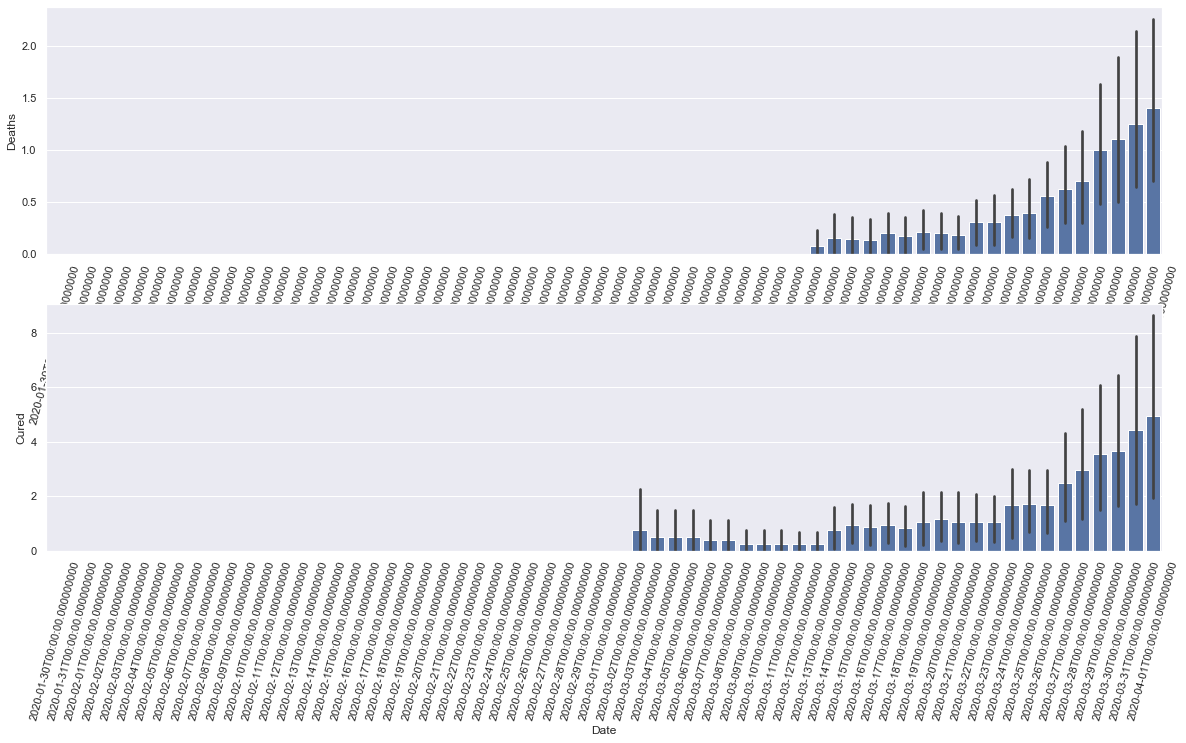

In [143]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(df_india["Date"],df_india["Deaths"],color="b")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.xticks(rotation=75)
# indices = range(len(df_india["Date"].unique()))
# width = np.min(np.diff(indices))/3.
plt.subplot(2,1,2)
sns.barplot(df_india["Date"],df_india["Cured"],color="b")

plt.xlabel("Date")
plt.ylabel("Cured")

plt.xticks(rotation=75)
plt.show()


In [144]:
range(len(df_india["Date"].unique()))

range(0, 63)

In [145]:
# plt.figure(figsize=(20,20))
# # df_india_srt = df_india.sort_values('Date', ascending=True)
# palette = sns.color_palette("hls", 30)
# # x_dates = [pd.to_datetime(df_india["Date"],infer_datetime_format=True)]
# sns.scatterplot(df_india["Date"],df_india["ConfirmedIndianNational"],sizes=(40, 400),hue=df_india["State/UnionTerritory"],palette=palette)
# plt.xticks(rotation=75)
# plt.show()

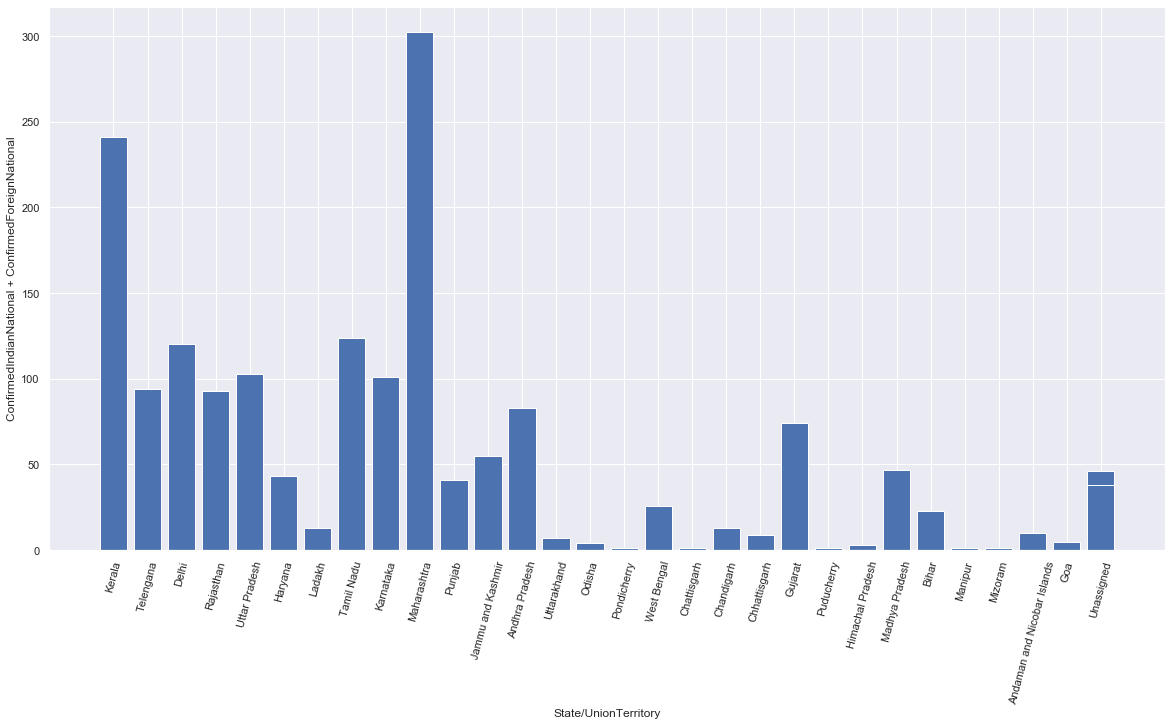

In [146]:
plt.figure(figsize=(20,10))
plt.bar(df_india["State/UnionTerritory"],df_india["Confirmed"])
plt.xlabel("State/UnionTerritory")
plt.ylabel("ConfirmedIndianNational + ConfirmedForeignNational")
plt.xticks(rotation=75)
plt.show()

In [147]:
# df_india["State/UnionTerritory"].value_counts()

In [148]:
df_india_date_wise["Date"] = pd.to_datetime(df_india_date_wise["Date"],infer_datetime_format=True)

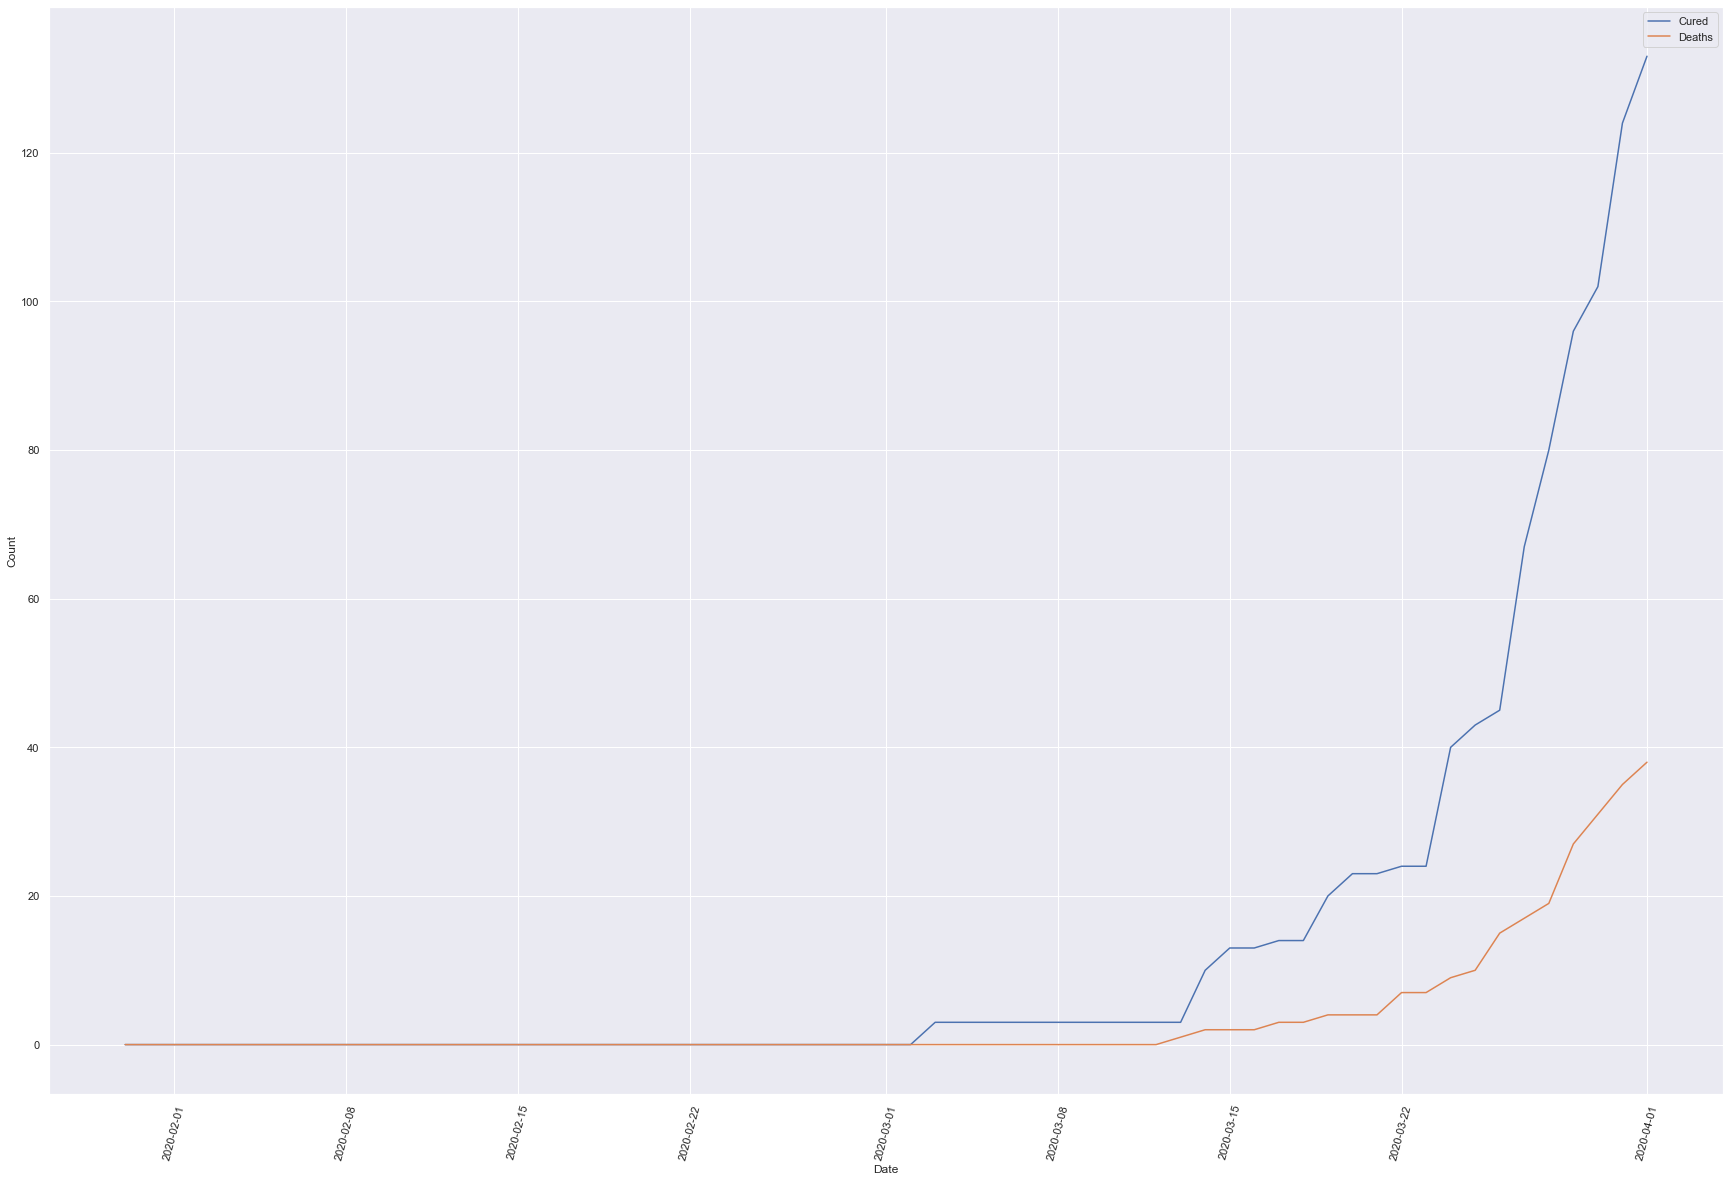

In [149]:
plt.figure(figsize=(30,20))
sns.lineplot(tmp["Date"],tmp["Cured"])
sns.lineplot(tmp["Date"],tmp["Deaths"])
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.legend(["Cured","Deaths"])
plt.show()

In [150]:
# plt.figure(figsize=(20,30))
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
# plt.bar(df_india["Date"],df_india["ConfirmedForeignNational"])
# plt.xlabel("Date")
# plt.xticks(rotation=75)
# plt.ylabel("ConfirmedIndianNational + ConfirmedForeignNational")
# plt.legend(["ConfirmedIndianNational","ConfirmedForeignNational"])
# plt.show()

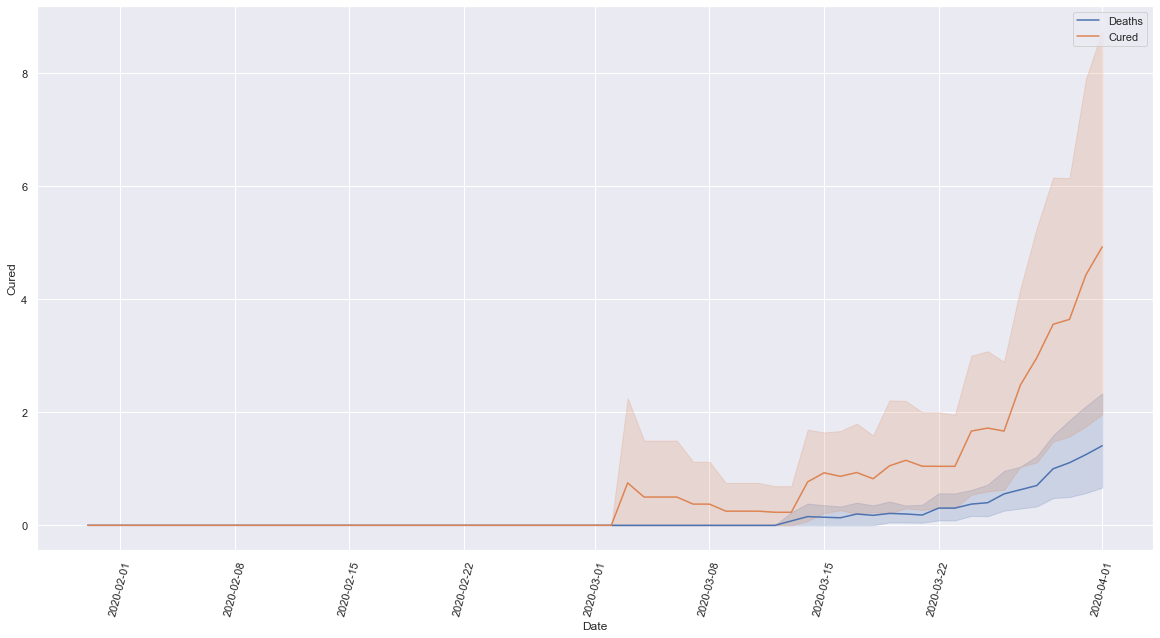

In [151]:
plt.figure(figsize=(20,10))
sns.lineplot(df_india["Date"],df_india["Deaths"])
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
sns.lineplot(df_india["Date"],df_india["Cured"])
plt.legend(["Deaths","Cured"])
plt.xticks(rotation=75)
plt.show()

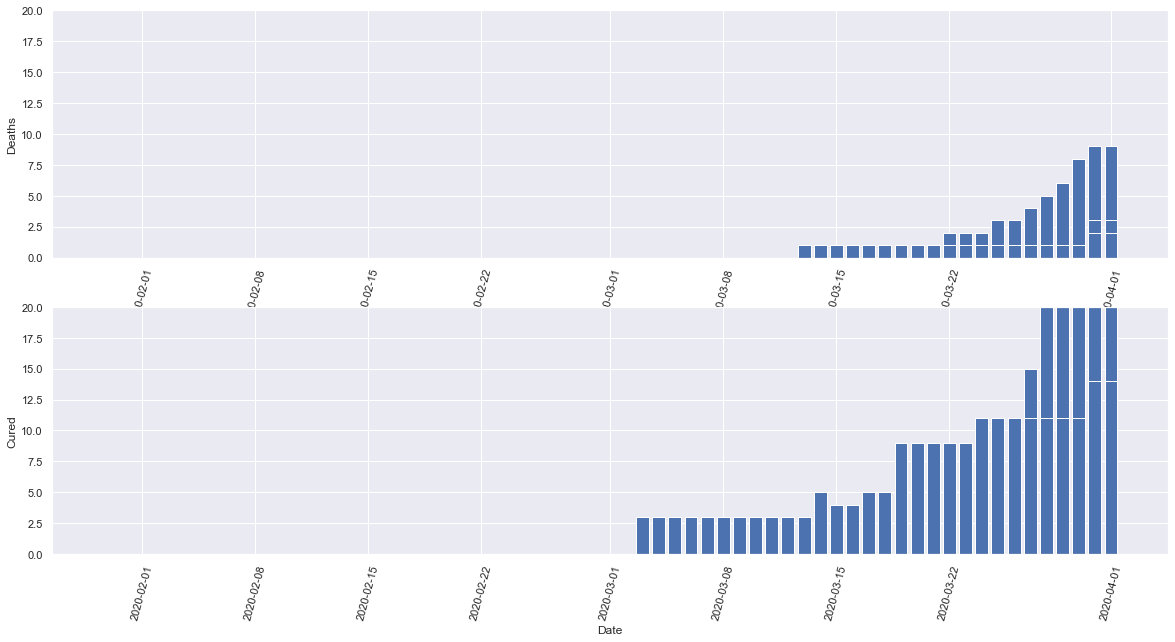

In [152]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.bar(df_india["Date"],df_india["Deaths"])
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
plt.xticks(rotation=75)
plt.ylim(0, 20)
plt.xlabel("Date")
plt.ylabel("Deaths")

plt.subplot(2,1,2)
plt.bar(df_india["Date"],df_india["Cured"])
plt.xlabel("Date")
plt.ylabel("Cured")
plt.ylim(0, 20)

plt.xticks(rotation=75)
plt.show()

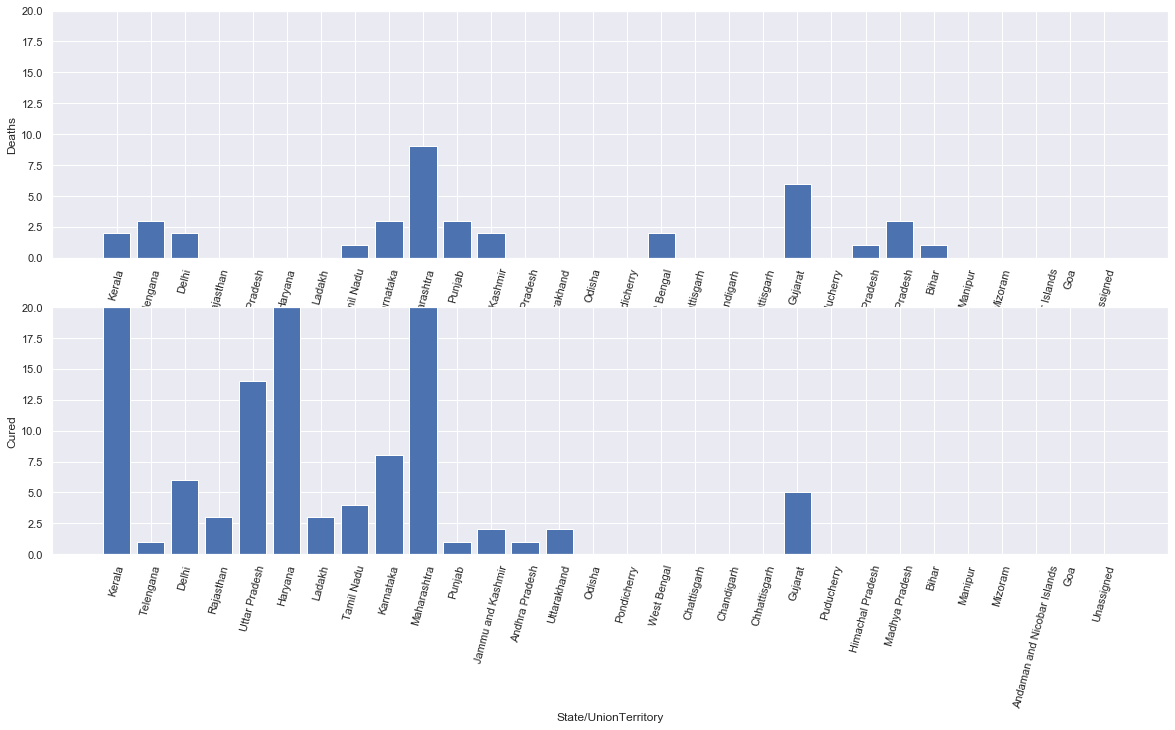

In [153]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.bar(df_india["State/UnionTerritory"],df_india["Deaths"])
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
plt.xticks(rotation=75)
plt.ylim(0, 20)
plt.xlabel("State/UnionTerritory")
plt.ylabel("Deaths")

plt.subplot(2,1,2)
plt.bar(df_india["State/UnionTerritory"],df_india["Cured"])
plt.xlabel("State/UnionTerritory")
plt.ylabel("Cured")
plt.ylim(0, 20)

plt.xticks(rotation=75)
plt.show()

In [154]:
# temp = date_wise_data.melt(id_vars="Date", value_vars=['Cured', 'Deaths', 'Confirmed'],
#                  var_name='Case', value_name='Count')

In [155]:
df_individual = pd.read_csv("D:/Dataset/coronavirus/COVID_19_India/IndividualDetails.csv")

In [156]:
df_individual.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,NaN


In [157]:
df_individual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 12 columns):
id                    1304 non-null int64
government_id         257 non-null object
diagnosed_date        1304 non-null object
age                   485 non-null object
gender                533 non-null object
detected_city         643 non-null object
detected_district     955 non-null object
detected_state        1085 non-null object
nationality           414 non-null object
current_status        1085 non-null object
status_change_date    1082 non-null object
notes                 1060 non-null object
dtypes: int64(1), object(11)
memory usage: 122.4+ KB


In [158]:
# df_individual["Diagnosed date"] = pd.to_datetime(df_individual["Diagnosed date"],infer_datetime_format=True)
df_individual['gender']=df_individual['gender'].fillna("UNK")

In [159]:
df_individual["age"] = df_individual["age"].fillna(0)
df_individual["age"] = df_individual['age'].replace('28-35',32)

In [160]:
df_individual['diagnosed_date']=pd.to_datetime(df_individual['diagnosed_date'],dayfirst=True,infer_datetime_format=True)

In [161]:
df_individual['current_status'].value_counts()

Hospitalized    1023
Recovered         43
Deceased          18
Migrated           1
Name: current_status, dtype: int64

In [162]:
df_individual.isnull().sum()

id                       0
government_id         1047
diagnosed_date           0
age                      0
gender                   0
detected_city          661
detected_district      349
detected_state         219
nationality            890
current_status         219
status_change_date     222
notes                  244
dtype: int64

In [163]:
df_individual[df_individual['detected_state'].isnull()]

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
1085,1085,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1086,1086,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1087,1087,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1088,1088,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1089,1089,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1299,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,1300,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1301,1301,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1302,1302,NaN,2020-03-29,0,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
df_individual['gender'].value_counts()

UNK    771
M      351
F      182
Name: gender, dtype: int64

In [165]:
df_individual_tmp = df_individual

In [166]:
df_individual_tmp.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,2020-01-30,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,2020-02-02,0,UNK,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,2020-02-03,0,UNK,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,2020-03-02,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,2020-03-02,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,NaN


In [167]:
df_individual_tmp["age"].value_counts()

0     819
21     23
24     19
55     18
25     16
     ... 
12      1
89      1
73      1
81      1
96      1
Name: age, Length: 74, dtype: int64

In [168]:
df_individual_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 12 columns):
id                    1304 non-null int64
government_id         257 non-null object
diagnosed_date        1304 non-null datetime64[ns]
age                   1304 non-null object
gender                1304 non-null object
detected_city         643 non-null object
detected_district     955 non-null object
detected_state        1085 non-null object
nationality           414 non-null object
current_status        1085 non-null object
status_change_date    1082 non-null object
notes                 1060 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 122.4+ KB


In [169]:
df_individual_tmp['age']= df_individual_tmp['age'].astype('int64')

In [170]:
deceased_age = df_individual_tmp[df_individual_tmp["current_status"]=='Deceased']

In [171]:
# deceased_age.head()

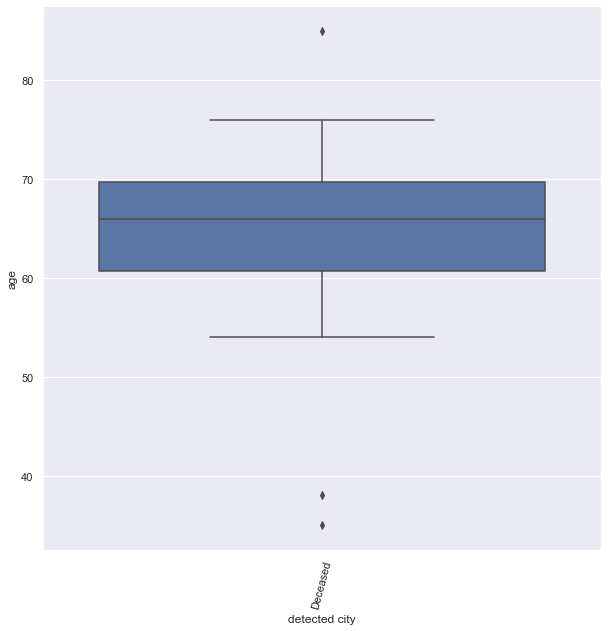

In [172]:
plt.figure(figsize=(10,10))
sns.boxplot(deceased_age["current_status"],deceased_age["age"])
plt.xlabel("detected city")
plt.xticks(rotation=75)
plt.ylabel("age")
plt.show()

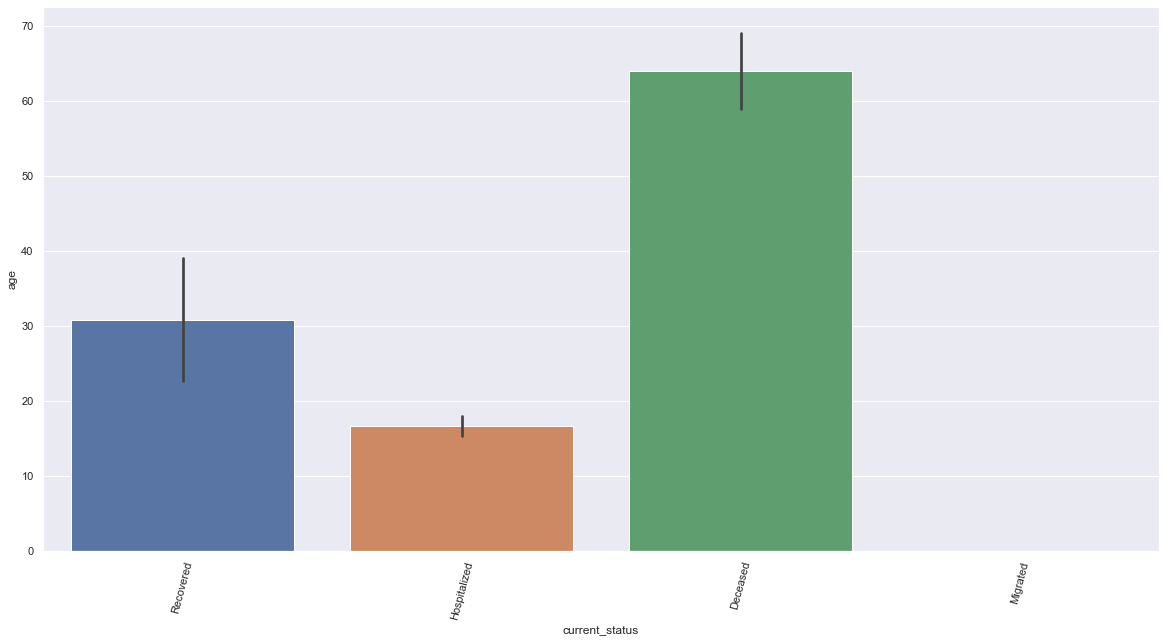

In [173]:
plt.figure(figsize=(20,10))
sns.barplot(df_individual_tmp["current_status"],df_individual_tmp["age"])
plt.xlabel("current_status")
plt.xticks(rotation=75)
plt.ylabel("age")
plt.show()

In [174]:
df_individual['gender'].value_counts()/len(df_individual['gender'])*100

UNK    59.125767
M      26.917178
F      13.957055
Name: gender, dtype: float64

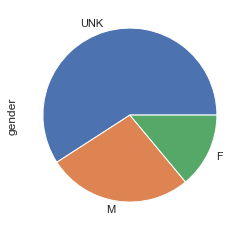

In [175]:
df_individual['gender'].value_counts().plot(kind='pie')

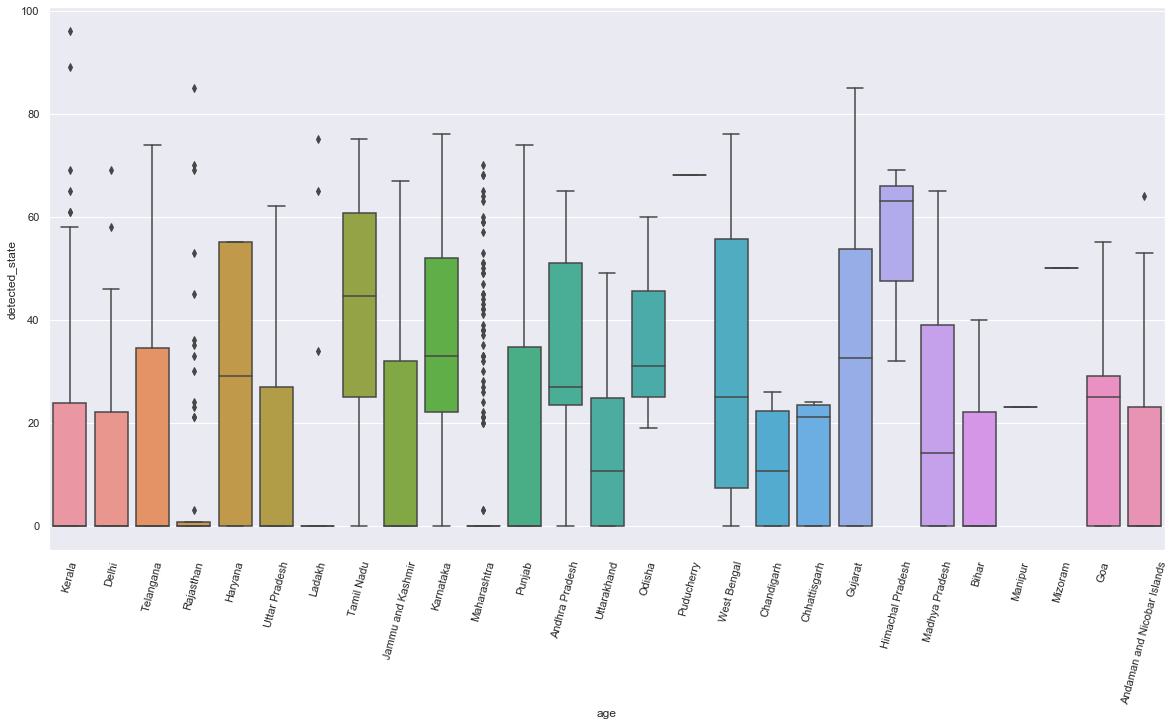

In [176]:
plt.figure(figsize=(20,10))
sns.boxplot(df_individual_tmp['detected_state'],df_individual_tmp['age'])
plt.xlabel("age")
plt.ylabel("detected_state")
plt.xticks(rotation=75)
plt.show()

In [177]:
df_individual_tmp['diagnosed_date']=pd.to_datetime(df_individual_tmp['diagnosed_date'],dayfirst=True,infer_datetime_format=True)

In [178]:
# df_individual_tmp = df_individual_tmp.groupby(["diagnosed_date","detected_state"])["current_status"].sum().reset_index()
# tmp = df_india_date_wise.groupby(['Date'])["Active Cases","Cured","Deaths","State/UnionTerritory"].sum().reset_index()

In [179]:
df_individual_tmp['current_status'].value_counts()

Hospitalized    1023
Recovered         43
Deceased          18
Migrated           1
Name: current_status, dtype: int64

In [180]:
# df_individual_tmp['detected_state'].value_counts()

In [181]:
deaths_state=df_individual_tmp['detected_state'][df_individual_tmp['current_status']=='Deceased'].value_counts()

In [182]:
deaths_state=dict(deaths_state)

In [183]:
df_age_group.head(20)

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [184]:
df_age_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Sno           10 non-null int64
AgeGroup      10 non-null object
TotalCases    10 non-null int64
Percentage    10 non-null object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


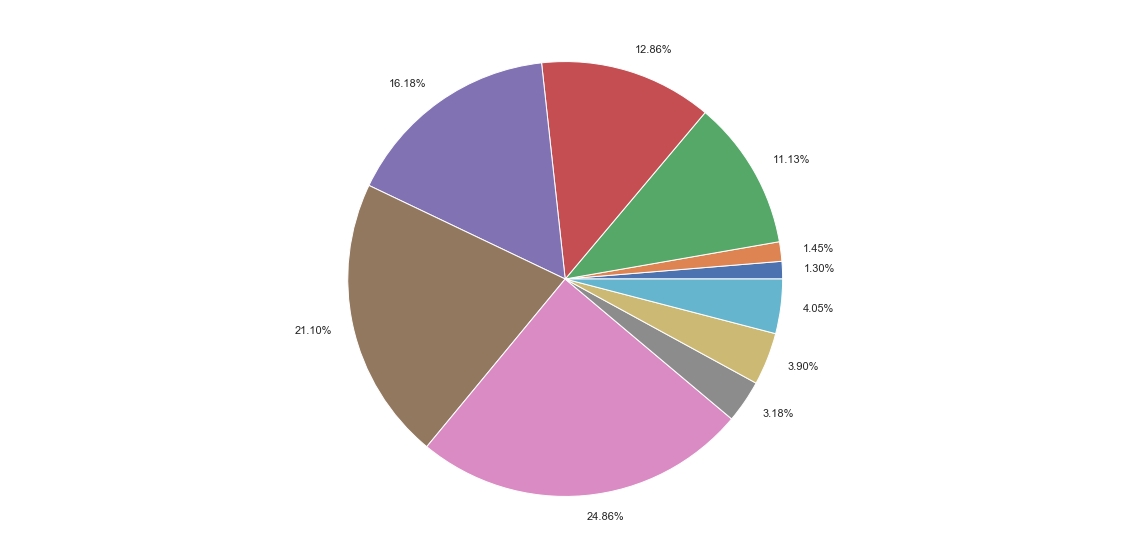

In [185]:
from matplotlib.pyplot import pie, axis
plt.figure(figsize=(20,10))
# fig1,ax1 = plt.subplots()
# ax1.pie(df_age_group['TotalCases'],df_age_group['AgeGroup'], shadow=True)

sums = df_age_group.groupby(df_age_group["Percentage"])["TotalCases"].sum()
axis('equal');
pie(sums, labels=sums.index);

# ax1.equal()
plt.show()

In [186]:
df_imcrt.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 0:00,6500,5900,78,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125,12235,150,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 10:00,13316,12426,168,ICMR_website_update_19March_10AM_IST_V2.pdf
3,4,19/03/20 18:00,14175,13285,182,ICMR_website_update_19March_6PM_IST.pdf
4,5,20/03/20 10:00,14376,13486,206,ICMR_website_update_20March_10AM_IST.pdf


In [187]:
df_imcrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
SNo                       16 non-null int64
DateTime                  16 non-null object
TotalSamplesTested        16 non-null int64
TotalIndividualsTested    16 non-null int64
TotalPositiveCases        16 non-null int64
Source                    16 non-null object
dtypes: int64(4), object(2)
memory usage: 896.0+ bytes


In [188]:
df_imcrt['DateTime']= pd.to_datetime(df_imcrt['DateTime'],infer_datetime_format=True,dayfirst=True)

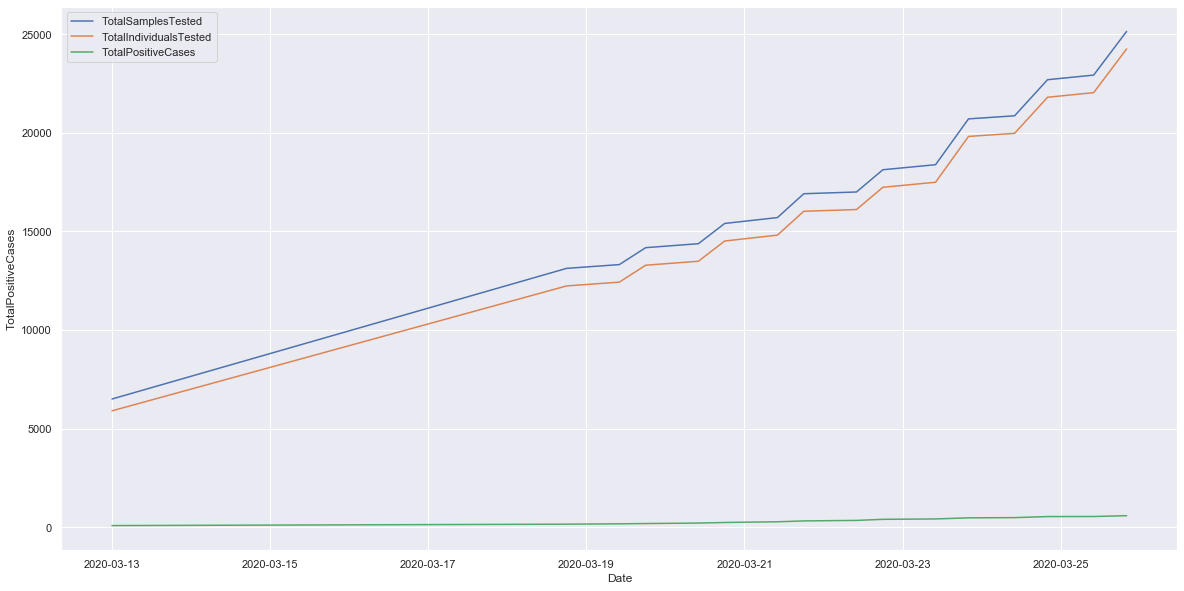

In [189]:
plt.figure(figsize=(20,10))
sns.lineplot(df_imcrt['DateTime'],df_imcrt['TotalSamplesTested'])
sns.lineplot(df_imcrt['DateTime'],df_imcrt['TotalIndividualsTested'])
sns.lineplot(df_imcrt['DateTime'],df_imcrt['TotalPositiveCases'])
plt.legend(["TotalSamplesTested","TotalIndividualsTested","TotalPositiveCases"])
plt.xlabel("Date")
plt.show()

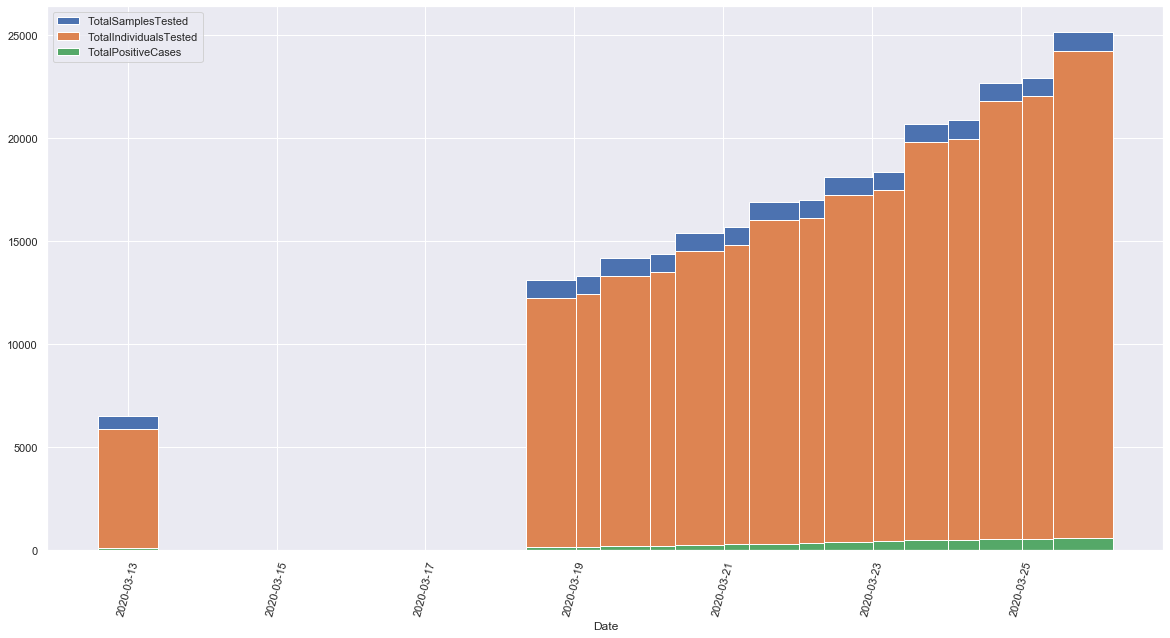

In [190]:
plt.figure(figsize=(20,10))
plt.bar(df_imcrt['DateTime'],df_imcrt['TotalSamplesTested'])
plt.bar(df_imcrt['DateTime'],df_imcrt['TotalIndividualsTested'])
plt.bar(df_imcrt['DateTime'],df_imcrt['TotalPositiveCases'])
plt.legend(["TotalSamplesTested","TotalIndividualsTested","TotalPositiveCases"])
plt.xlabel("Date")
plt.xticks(rotation=75)
plt.show()

In [191]:
df_population.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [192]:
df_population.shape

(36, 8)

In [193]:
df_hospital_bed.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [194]:
df_hospital_bed.shape

(38, 14)

In [195]:
recent_date = df_india['Date'].max()
mortality_statewise = df_india[df_india['Date']==recent_date]

In [196]:
# mortality_statewise = mortality_statewise.groupby(['Date','State/UnionTerritory'])["Active Cases","Confirmed","Cured","Deaths","Total Cases"].sum().reset_index()

In [197]:
mortality_statewise.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
529,2020-04-01,9:00 AM,Andhra Pradesh,0,0,1,0,83,83,82
530,2020-04-01,9:00 AM,Andaman and Nicobar Islands,0,0,0,0,10,10,10
531,2020-04-01,9:00 AM,Bihar,0,0,0,1,23,23,22
532,2020-04-01,9:00 AM,Chandigarh,0,0,0,0,13,13,13
533,2020-04-01,9:00 AM,Chhattisgarh,0,0,0,0,9,9,9


In [198]:
mortality_statewise.shape

(27, 10)

In [199]:
mortality_statewise['Mortality_Rate']=(mortality_statewise['Deaths']/mortality_statewise['Total Cases'])*100

c:\users\indra\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
mortality_statewise.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases,Mortality_Rate
529,2020-04-01,9:00 AM,Andhra Pradesh,0,0,1,0,83,83,82,0.000000
530,2020-04-01,9:00 AM,Andaman and Nicobar Islands,0,0,0,0,10,10,10,0.000000
531,2020-04-01,9:00 AM,Bihar,0,0,0,1,23,23,22,4.347826
532,2020-04-01,9:00 AM,Chandigarh,0,0,0,0,13,13,13,0.000000
533,2020-04-01,9:00 AM,Chhattisgarh,0,0,0,0,9,9,9,0.000000


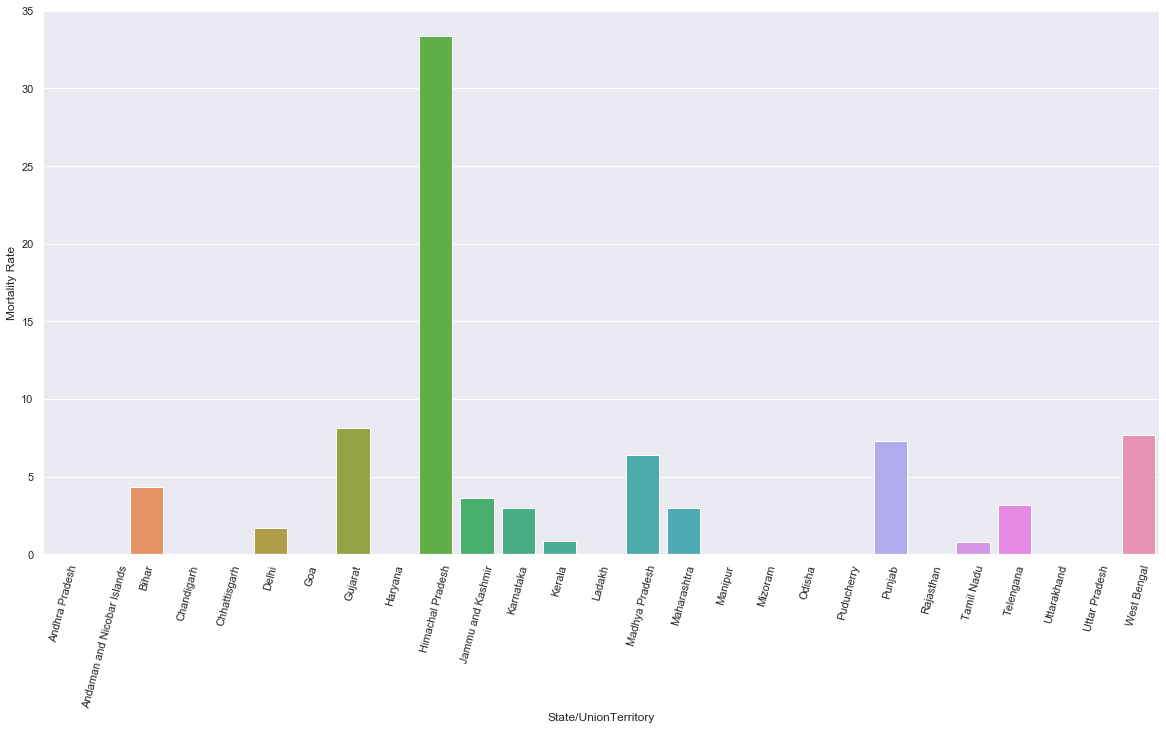

In [201]:
plt.figure(figsize=(20,10))
sns.barplot(mortality_statewise['State/UnionTerritory'],mortality_statewise['Mortality_Rate'])
plt.xlabel("State/UnionTerritory")
plt.ylabel("Mortality Rate")
plt.xticks(rotation=75)
plt.show()

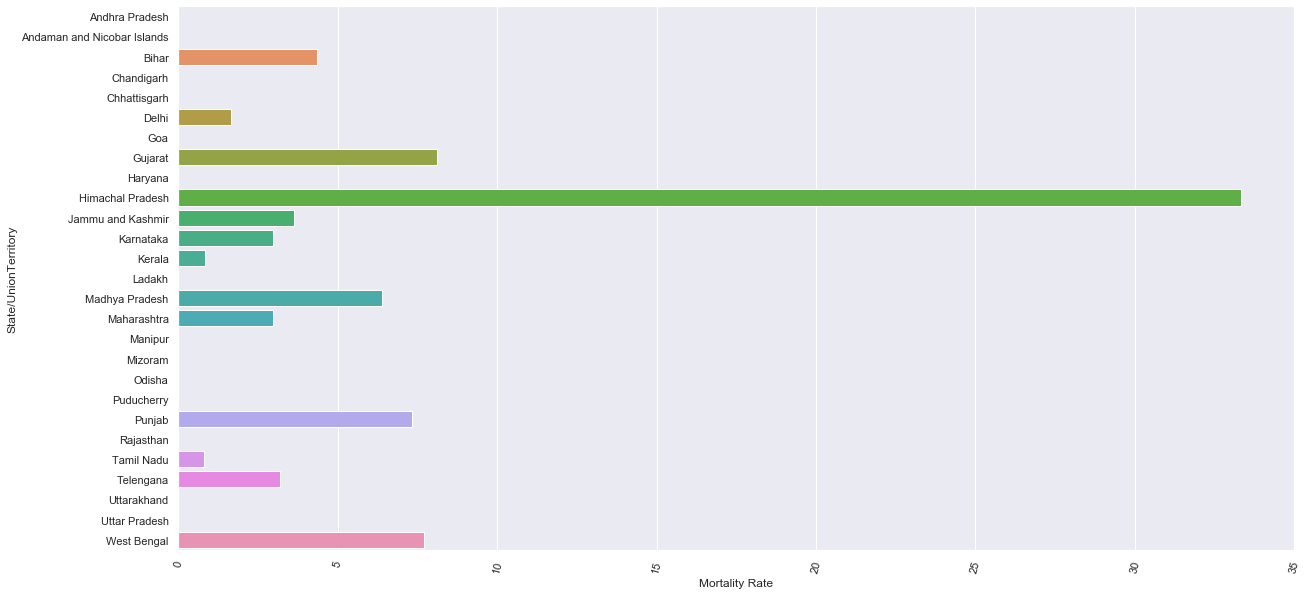

In [202]:
plt.figure(figsize=(20,10))
sns.barplot(mortality_statewise['Mortality_Rate'],mortality_statewise['State/UnionTerritory'])
plt.ylabel("State/UnionTerritory")
plt.xlabel("Mortality Rate")
plt.xticks(rotation=75)
plt.show()